**Download** (right-click, save target as ...) this page as a Jupyterlab notebook from: [CHYD-2](http://54.243.252.9/ce-3305-webroot/2-Exercises/CHYD-2/CHYD-2.ipynb)

___

# <font color=darkblue>CE 3305 Engineering Fluid Mechanics <br> Summer 2022 Computational Hydraulics Exercise Set 2</font>

**LAST NAME, FIRST NAME**

**R00000000**

___

### Purpose : 
Apply computational thinking (ENGR 1330) principles and hydraulics/fluid mechanics principles to produce a plot of water surface in an open channel.
### Assessment Criteria : 
Completion, plausible solutions, use JupyterLab as a calculator.
___

### Problem 1.

Water flows at a steady rate of 192 $\frac{ft^3}{s}$ through a concrete-lined rectangular channel 16 ft wide as depicted in Figure 1. Water enters the 0.35% sloped channel ($S_0$ = 0.0035) at location 1 and is flowing at 110% normal depth ($1.1 \times y_n$). The water exits over a 3-foot tall weir (assume sharp-crest weir) at location 2.1

<figure align="center">
<!--<img src="./pipe-network.png" width="400" > -->
<img src="http://54.243.252.9/ce-3305-webroot/2-Exercises/CHYD-2/channel_profile.png" width="600" >
<figcaption>Figure 1. Concrete-lined rectangular channel</figcaption>
</figure>

Find:
- Normal depth for the channel.
- Critical depth for the channel.
- Pool depth just upstream of the weir. (Hint: Add the critical depth to the weir height as an approximation to the pool depth)
- Plot the water surface profile for the channel from location 1 to location 2
- Estimate the distance upstream from the weir to location 1 

In [ ]:
# sketch here

In [ ]:
# list known quantities

In [ ]:
# list unknown quantities

In [ ]:
# governing principles (fluid mechanics)

In [ ]:
# solution (using JupyterLab notebook) (computational thinking/algorithm development)

In [1]:
# prototype functions
def A_rect(B,y):
    A_rect = B*y
    return(A_rect)

def P_rect(B,y):
    P_rect = B + y + y
    return(P_rect)

def Rh(A,P):
    Rh = A/P
    return(Rh)

def slope_f(discharge,mannings_n,area,radius):
    slope_f = (discharge**2)*(mannings_n**2)/( (radius**(4/3))*(area**2) )
    return(slope_f)

In [28]:
# input information
begin_depth = 4.64
end_depth   = 0.3
discharge   = 192
how_many    = 199
manningn    = 0.015
slope       = 0.0035
width       = 16

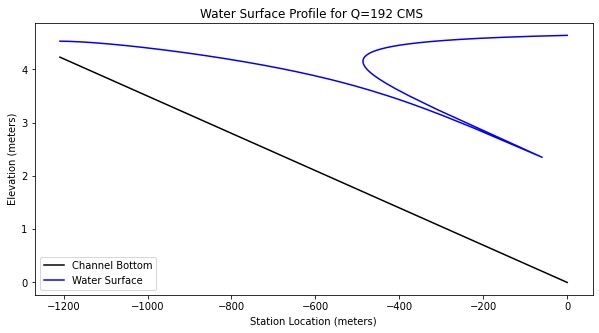

Depth at station -1208.70880742924  is 0.2999999999999998


In [34]:
import numpy
# empty lists for variables
depth    = [0 for i in range(how_many)] #flow depth
bse      = [0 for i in range(how_many)] #channel bottom elevation
wse      = [0 for i in range(how_many)] #water surface elevation
deltax   = [0 for i in range(how_many)] #space steps
distance = [0 for i in range(how_many)] #station locations
velocity = [0 for i in range(how_many)] #section velocity

delta_depth = (begin_depth-end_depth)/(how_many-1)# change in depth for finding spatial steps

depth[0] = (begin_depth) # assign downstream value

for i in range(how_many):
    depth[i] = (depth[0]-i*delta_depth)# depth values to evaluate
    velocity[i] = (discharge/A_rect(width,depth[i])) #velocity for each depth
    
for i in range(how_many-1):
    depth_bar     = 0.5*(depth[i]+depth[i+1])    #compute average depth in reach
    area_bar      = A_rect(width,depth_bar)      #compute average area in reach
    perimeter_bar = P_rect(width,depth_bar)  #compute average wetted perimeter
    radius_bar    = Rh(area_bar,perimeter_bar)   #compute average hydraulic radius
    friction = slope_f(discharge,manningn,area_bar,radius_bar) #compute friction slope
    deltax[i] = ((depth[i+1]+(velocity[i+1]**2)/(2*9.8)) - (depth[i] + (velocity[i]**2)/(2*9.8)))/(slope-friction)
    #if numpy.sign(deltax[i]) != numpy.sign(deltax[i-1]) :
        #raise Exception(print('hydraulic jump nearby - switch delta x sign'))

wse[0]=bse[0]+depth[0] # water surface at control point
for i in range(1,how_many):
    distance[i] = distance[i-1]+deltax[i-1]; # station distances
    bse[i] = bse[i-1]-deltax[i-1]*slope; # bottom elevations
    wse[i] = bse[i]+depth[i] # water surface elevations

import matplotlib.pyplot as plt # the python plotting library
plottitle ='Water Surface Profile for Q=' + str(round(discharge,1)) + ' CMS '
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(distance, bse, c='black') # basic line plot
plt.plot(distance, wse, c='blue') # basic line plot
plt.legend(['Channel Bottom','Water Surface'])
plt.xlabel('Station Location (meters)')
plt.ylabel('Elevation (meters)')
plt.title(plottitle)
plt.show()

print("Depth at station",distance[how_many-1]," is",depth[how_many-1])

# discussion
in the code see exception block, one can try to correct for the hydraulic jump, but out of scope for the class.

or do into two parts entry to yc, then yc to flow over weir as below


In [36]:
# input information
begin_depth = 0.3
end_depth   = 1.63
discharge   = 192
how_many    = 199
manningn    = 0.015
slope       = 0.0035
width       = 16

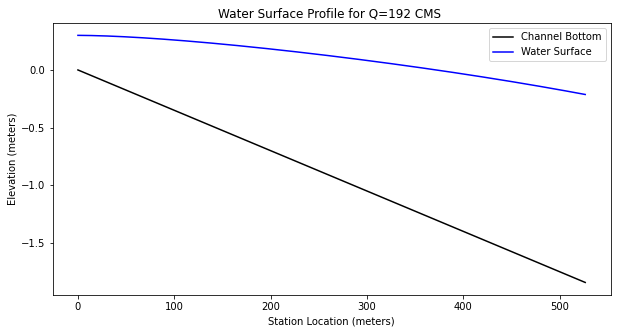

Depth at station 526.5007732631834  is 1.63


In [37]:
import numpy
# empty lists for variables
depth    = [0 for i in range(how_many)] #flow depth
bse      = [0 for i in range(how_many)] #channel bottom elevation
wse      = [0 for i in range(how_many)] #water surface elevation
deltax   = [0 for i in range(how_many)] #space steps
distance = [0 for i in range(how_many)] #station locations
velocity = [0 for i in range(how_many)] #section velocity

delta_depth = (begin_depth-end_depth)/(how_many-1)# change in depth for finding spatial steps

depth[0] = (begin_depth) # assign downstream value

for i in range(how_many):
    depth[i] = (depth[0]-i*delta_depth)# depth values to evaluate
    velocity[i] = (discharge/A_rect(width,depth[i])) #velocity for each depth
    
for i in range(how_many-1):
    depth_bar     = 0.5*(depth[i]+depth[i+1])    #compute average depth in reach
    area_bar      = A_rect(width,depth_bar)      #compute average area in reach
    perimeter_bar = P_rect(width,depth_bar)  #compute average wetted perimeter
    radius_bar    = Rh(area_bar,perimeter_bar)   #compute average hydraulic radius
    friction = slope_f(discharge,manningn,area_bar,radius_bar) #compute friction slope
    deltax[i] = ((depth[i+1]+(velocity[i+1]**2)/(2*9.8)) - (depth[i] + (velocity[i]**2)/(2*9.8)))/(slope-friction)
    #if numpy.sign(deltax[i]) != numpy.sign(deltax[i-1]) :
        #raise Exception(print('hydraulic jump nearby - switch delta x sign'))

wse[0]=bse[0]+depth[0] # water surface at control point
for i in range(1,how_many):
    distance[i] = distance[i-1]+deltax[i-1]; # station distances
    bse[i] = bse[i-1]-deltax[i-1]*slope; # bottom elevations
    wse[i] = bse[i]+depth[i] # water surface elevations

import matplotlib.pyplot as plt # the python plotting library
plottitle ='Water Surface Profile for Q=' + str(round(discharge,1)) + ' CMS '
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(distance, bse, c='black') # basic line plot
plt.plot(distance, wse, c='blue') # basic line plot
plt.legend(['Channel Bottom','Water Surface'])
plt.xlabel('Station Location (meters)')
plt.ylabel('Elevation (meters)')
plt.title(plottitle)
plt.show()

print("Depth at station",distance[how_many-1]," is",depth[how_many-1])

526 meters

In [58]:
# input information
begin_depth = 1.65
end_depth   = 2.1
discharge   = 192
how_many    = 199
manningn    = 0.015
slope       = 0.0035
width       = 16

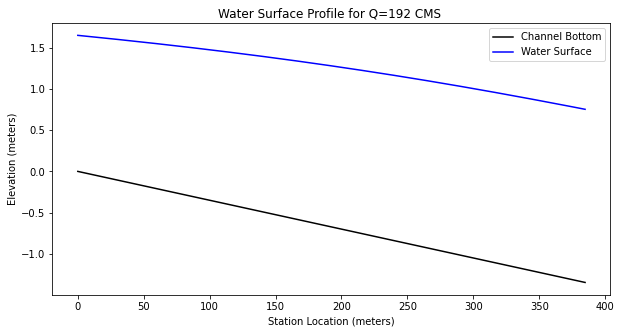

Depth at station 384.79104298833596  is 2.1


In [59]:
import numpy
# empty lists for variables
depth    = [0 for i in range(how_many)] #flow depth
bse      = [0 for i in range(how_many)] #channel bottom elevation
wse      = [0 for i in range(how_many)] #water surface elevation
deltax   = [0 for i in range(how_many)] #space steps
distance = [0 for i in range(how_many)] #station locations
velocity = [0 for i in range(how_many)] #section velocity

delta_depth = (begin_depth-end_depth)/(how_many-1)# change in depth for finding spatial steps

depth[0] = (begin_depth) # assign downstream value

for i in range(how_many):
    depth[i] = (depth[0]-i*delta_depth)# depth values to evaluate
    velocity[i] = (discharge/A_rect(width,depth[i])) #velocity for each depth
    
for i in range(how_many-1):
    depth_bar     = 0.5*(depth[i]+depth[i+1])    #compute average depth in reach
    area_bar      = A_rect(width,depth_bar)      #compute average area in reach
    perimeter_bar = P_rect(width,depth_bar)  #compute average wetted perimeter
    radius_bar    = Rh(area_bar,perimeter_bar)   #compute average hydraulic radius
    friction = slope_f(discharge,manningn,area_bar,radius_bar) #compute friction slope
    deltax[i] = ((depth[i+1]+(velocity[i+1]**2)/(2*9.8)) - (depth[i] + (velocity[i]**2)/(2*9.8)))/(slope-friction)
    #if numpy.sign(deltax[i]) != numpy.sign(deltax[i-1]) :
        #raise Exception(print('hydraulic jump nearby - switch delta x sign'))

wse[0]=bse[0]+depth[0] # water surface at control point
for i in range(1,how_many):
    distance[i] = distance[i-1]+deltax[i-1]; # station distances
    bse[i] = bse[i-1]-deltax[i-1]*slope; # bottom elevations
    wse[i] = bse[i]+depth[i] # water surface elevations

import matplotlib.pyplot as plt # the python plotting library
plottitle ='Water Surface Profile for Q=' + str(round(discharge,1)) + ' CMS '
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(distance, bse, c='black') # basic line plot
plt.plot(distance, wse, c='blue') # basic line plot
plt.legend(['Channel Bottom','Water Surface'])
plt.xlabel('Station Location (meters)')
plt.ylabel('Elevation (meters)')
plt.title(plottitle)
plt.show()

print("Depth at station",distance[how_many-1]," is",depth[how_many-1])

In [68]:
# input information
begin_depth = 2.45
end_depth   = 4.64
discharge   = 192
how_many    = 199
manningn    = 0.015
slope       = 0.0035
width       = 16

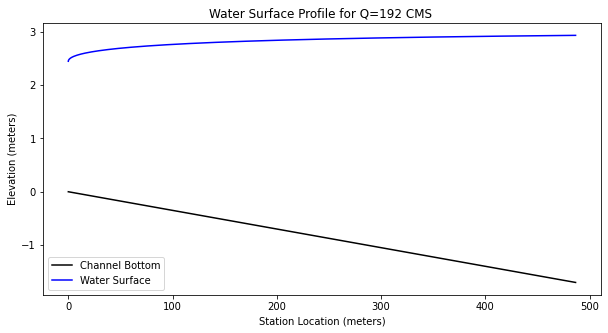

Depth at station 486.64701771763987  is 4.64


In [69]:
import numpy
# empty lists for variables
depth    = [0 for i in range(how_many)] #flow depth
bse      = [0 for i in range(how_many)] #channel bottom elevation
wse      = [0 for i in range(how_many)] #water surface elevation
deltax   = [0 for i in range(how_many)] #space steps
distance = [0 for i in range(how_many)] #station locations
velocity = [0 for i in range(how_many)] #section velocity

delta_depth = (begin_depth-end_depth)/(how_many-1)# change in depth for finding spatial steps

depth[0] = (begin_depth) # assign downstream value

for i in range(how_many):
    depth[i] = (depth[0]-i*delta_depth)# depth values to evaluate
    velocity[i] = (discharge/A_rect(width,depth[i])) #velocity for each depth
    
for i in range(how_many-1):
    depth_bar     = 0.5*(depth[i]+depth[i+1])    #compute average depth in reach
    area_bar      = A_rect(width,depth_bar)      #compute average area in reach
    perimeter_bar = P_rect(width,depth_bar)  #compute average wetted perimeter
    radius_bar    = Rh(area_bar,perimeter_bar)   #compute average hydraulic radius
    friction = slope_f(discharge,manningn,area_bar,radius_bar) #compute friction slope
    deltax[i] = ((depth[i+1]+(velocity[i+1]**2)/(2*9.8)) - (depth[i] + (velocity[i]**2)/(2*9.8)))/(slope-friction)
    #if numpy.sign(deltax[i]) != numpy.sign(deltax[i-1]) :
        #raise Exception(print('hydraulic jump nearby - switch delta x sign'))

wse[0]=bse[0]+depth[0] # water surface at control point
for i in range(1,how_many):
    distance[i] = distance[i-1]+deltax[i-1]; # station distances
    bse[i] = bse[i-1]-deltax[i-1]*slope; # bottom elevations
    wse[i] = bse[i]+depth[i] # water surface elevations

import matplotlib.pyplot as plt # the python plotting library
plottitle ='Water Surface Profile for Q=' + str(round(discharge,1)) + ' CMS '
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(distance, bse, c='black') # basic line plot
plt.plot(distance, wse, c='blue') # basic line plot
plt.legend(['Channel Bottom','Water Surface'])
plt.xlabel('Station Location (meters)')
plt.ylabel('Elevation (meters)')
plt.title(plottitle)
plt.show()

print("Depth at station",distance[how_many-1]," is",depth[how_many-1])

In [70]:
# total distance
486+384+526

1396